In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('C:/Users/Jillian/Desktop/Thinkful Data Files/breast-cancer-wisconsin.data',header=None)

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [69]:
df = df.rename(columns={0:'ID',1:'Clump Thickness',2:'Uniformity of Cell Size',3:'Uniformity of Cell Shape',
                        4:'Marginal Adhesion',5:'Single Epithelial Cell Size',6:'Bare Nuclei',
                        7:'Bland Chromatin',8:'Normal Nucleoli',9:'Mitoses',10:'Class'})

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [71]:
df[df['Bare Nuclei'].str.strip() == '?']

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [72]:
df.drop(df.loc[df['Bare Nuclei']=='?'].index, inplace=True)
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [73]:
df.nunique()

ID                             630
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [74]:
df.isnull().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [75]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [76]:
df.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


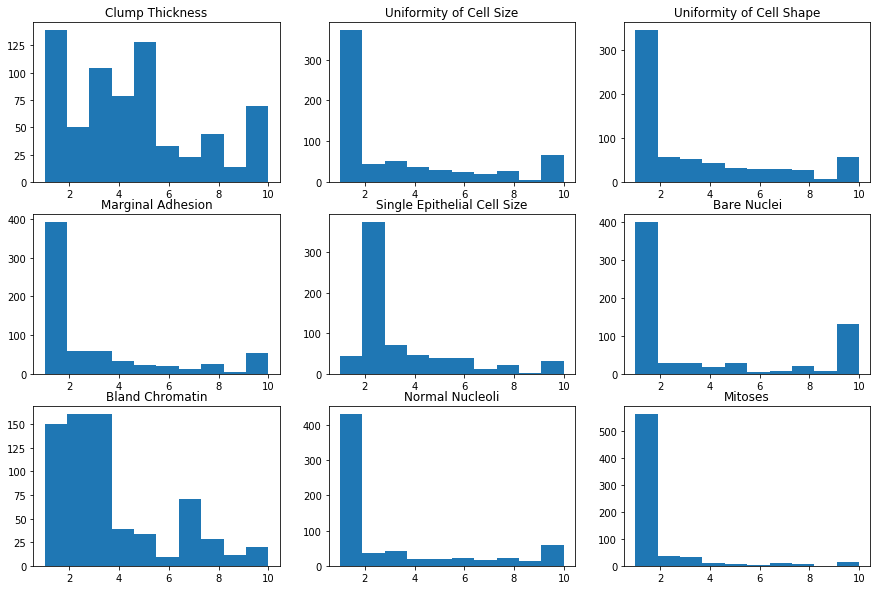

In [77]:
plt.figure(figsize = (15,10))

plt.subplot(3,3,1)
plt.hist(df['Clump Thickness'])
plt.title('Clump Thickness')

plt.subplot(3,3,2)
plt.hist(df['Uniformity of Cell Size'])
plt.title('Uniformity of Cell Size')

plt.subplot(3,3,3)
plt.hist(df['Uniformity of Cell Shape'])
plt.title('Uniformity of Cell Shape')

plt.subplot(3,3,4)
plt.hist(df['Marginal Adhesion'])
plt.title('Marginal Adhesion')

plt.subplot(3,3,5)
plt.hist(df['Single Epithelial Cell Size'])
plt.title('Single Epithelial Cell Size')

plt.subplot(3,3,6)
plt.hist(df['Bare Nuclei'])
plt.title('Bare Nuclei')

plt.subplot(3,3,7)
plt.hist(df['Bland Chromatin'])
plt.title('Bland Chromatin')

plt.subplot(3,3,8)
plt.hist(df['Normal Nucleoli'])
plt.title('Normal Nucleoli')

plt.subplot(3,3,9)
plt.hist(df['Mitoses'])
plt.title('Mitoses')
plt.show()

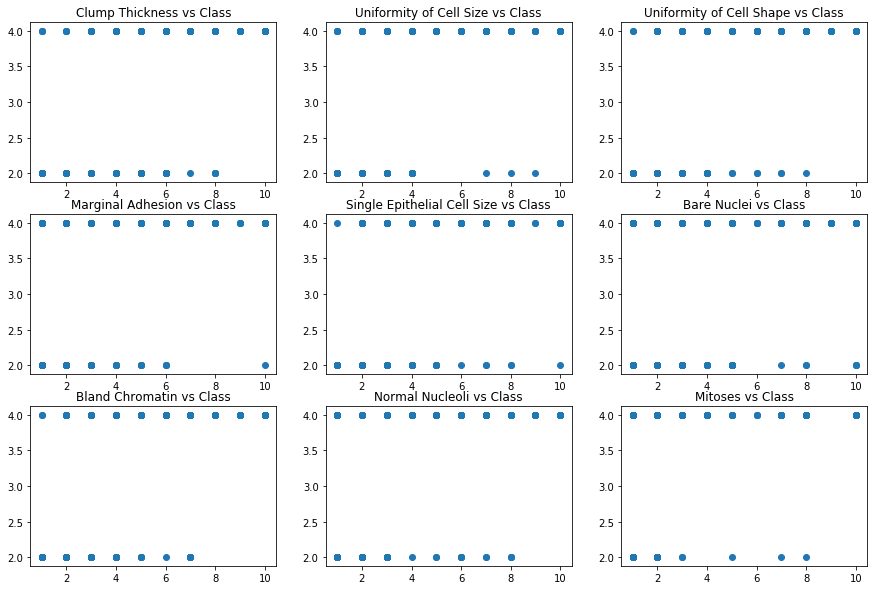

In [78]:
plt.figure(figsize = (15,10))

plt.subplot(3,3,1)
plt.scatter(df['Clump Thickness'],df['Class'])
plt.title('Clump Thickness vs Class')

plt.subplot(3,3,2)
plt.scatter(df['Uniformity of Cell Size'],df['Class'])
plt.title('Uniformity of Cell Size vs Class')

plt.subplot(3,3,3)
plt.scatter(df['Uniformity of Cell Shape'],df['Class'])
plt.title('Uniformity of Cell Shape vs Class')

plt.subplot(3,3,4)
plt.scatter(df['Marginal Adhesion'],df['Class'])
plt.title('Marginal Adhesion vs Class')

plt.subplot(3,3,5)
plt.scatter(df['Single Epithelial Cell Size'],df['Class'])
plt.title('Single Epithelial Cell Size vs Class')

plt.subplot(3,3,6)
plt.scatter(df['Bare Nuclei'],df['Class'])
plt.title('Bare Nuclei vs Class')

plt.subplot(3,3,7)
plt.scatter(df['Bland Chromatin'],df['Class'])
plt.title('Bland Chromatin vs Class')

plt.subplot(3,3,8)
plt.scatter(df['Normal Nucleoli'],df['Class'])
plt.title('Normal Nucleoli vs Class')

plt.subplot(3,3,9)
plt.scatter(df['Mitoses'],df['Class'])
plt.title('Mitoses vs Class')
plt.show()

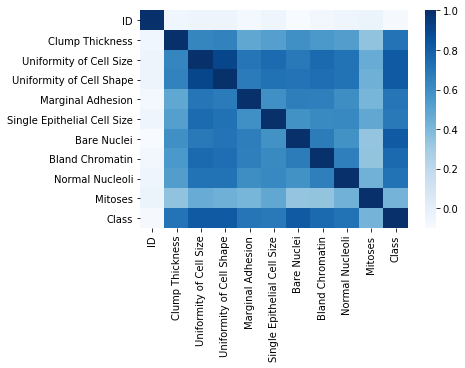

In [79]:
import seaborn as sns
sns.heatmap(df.corr(),cmap='Blues');

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class','ID'])
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [81]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.9781181619256017
0.9247787610619469


In [83]:
y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
(tn, fp, fn, tp)

(133, 0, 17, 76)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [85]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9824945295404814
0.9380530973451328


In [86]:
y_pred = knn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
(tn, fp, fn, tp)

(142, 6, 8, 70)

In [87]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=15
)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=15, splitter='best')

In [88]:
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9671772428884027
0.9336283185840708


In [89]:
y_pred = dtc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
(tn, fp, fn, tp)

(141, 6, 9, 70)

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)
lr.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [91]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.986870897155361
0.9380530973451328


In [92]:
y_pred = lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
(tn, fp, fn, tp)

(141, 5, 9, 71)

In [99]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [100]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
0.9292035398230089


In [101]:
y_pred = svc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
(tn, fp, fn, tp)

(134, 0, 16, 76)

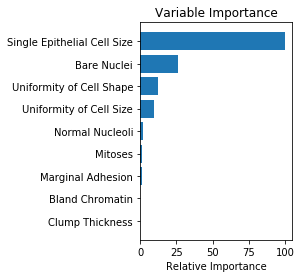

In [102]:
feature_importance = dtc.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()